# Demo of ExTrEMO


In this note book we will show how to run ExTrEMO.

In [103]:
from ExTrEMO import ExTrEMO

First of all, we need to define the benchmark problem. The details about our benchmark problems can be found in "Problems\dtlz.py". Each benchmark problem has 3 objectives.

In [104]:
from Problems import dtlz

test_problem = dtlz.DTLZ2(n_var=10)

Next, we need to prepare source datasets for ExTrEMO. It can be noticed that each of our benchmark problem contains three parameters, i.e., \delta_1, \delta_2, and \delta_3. By setting these three parameters to different values, a set of source tasks can be generated. Then, by randomly sampling according to source tasks, source datasets can be produced. The details about the creating of source datasets can be found in "creat_data.py". In this notebook, we have prepared a set of datasets, i.e., "Data\source_data_DTLZ2.p".

In [105]:
import pickle

dataS = pickle.load(open("Data\\source_data_DTLZ2.p", "rb"))

The structure of "dataS" is explained as follows: 
    
    "dataS[0][0]" and "dataS[1][0]" are the decision vectors and objective function values generated for the target task, i.e., the initilized dataset for the target task; 

    "dataS[0][1:201]" and "dataS[1][1:201]" are decision vectors and objective function values of 200 high-correlation source datasets; 

    "dataS[0][201:401]" and "dataS[1][201:401]" are decision vectors and objective function values of 200 medium-correlation source datasets; 

    "dataS[0][401:601]" and "dataS[1][401:601]" are decision vectors and objective function values of 200 low-correlation source datasets; 

    "dataS[0][601:801]" and "dataS[1][601:801]" are decision vectors and objective function values of 200 medium-negative-correlation source datasets; 

    "dataS[0][801:1001]" and "dataS[1][801:1001]" are decision vectors and objective function values of 200 high-negative-correlation source datasets. 
    
In terms of the initilized dataset for the target task, 20 samples are produced. For source datasets, 100 samples are reserved.

After the preparion, we can run ExTrEMO.

In [106]:
xT_ExTrEMO,yT_ExTrEMO,_ = ExTrEMO(test_problem, 
            dataS[0][10:11]+dataS[0][210:211]+dataS[0][410:411]+dataS[0][610:611]+dataS[0][810:811], 
            dataS[1][10:11]+dataS[1][210:211]+dataS[1][410:411]+dataS[1][610:611]+dataS[1][810:811], 
            dataS[0][0], 
            dataS[1][0], 
            max_iters = 30, 
            likelihood = 'gaussian', 
            kernel = 'RBF',
            opt_train='l-bfgs',
            opt_acqf='ga',
            subset_sel = None,
            )

[[2.07150265e-16 3.42901441e-16 6.54254460e+00]]
[[  0.10850727   8.86053691 103.40734768]]
[[0.20825835 7.20316927 0.        ]]
[[0.5238784  0.18568687 3.59002998]]
[[3.11830068 0.         0.09156739]]
[[1.72976149 0.66556297 1.98053492]]
[[0.19891203 6.86302101 2.91026995]]
[[7.15013489 8.96279678 0.        ]]
[[1.04043911 6.20613003 4.39956088]]
[[13.37125652  0.80063015  2.90218899]]
[[10.19164624  5.38438125  0.46452079]]
[[4.59674936 6.49339791 0.95510288]]
[[2.81128057 8.8133208  0.55434669]]
[[0.58586731 1.40628641 5.65505301]]
[[11.62872338  0.28850603  9.37243213]]
[[ 1.2893373   1.69047663 35.23369251]]
[[8.95606567 0.         3.96554925]]
[[14.41070342  6.25079848  0.53175412]]
[[0.11848103 8.79081898 1.0519467 ]]
[[3.09805050e-16 2.82352479e-15 4.63884000e+01]]
[[3.15665485e-02 6.52169289e-02 4.42917474e+01]]
[[6.55424868e-16 3.09245141e-16 1.18355221e+01]]
[[ 3.33326093 13.26544114  2.07985368]]
[[3.85312387 0.92287769 0.36958211]]
[[ 2.05250668 31.53440745 26.43775874]]


We also provide the code of ParEGO for comparison

In [107]:
from ParEGO import ParEGO

xT_ParEGO,yT_ParEGO = ParEGO(test_problem, 
            dataS[0][0], 
            dataS[1][0], 
            max_iters = 30, 
            likelihood = 'gaussian', 
            kernel = 'RBF',
            opt_train='l-bfgs',
            opt_acqf='ga',
            )

[[1.25231118e-15 2.04517936e+01 1.90536481e+00]]
[[ 4.7978862  14.3933183   0.18497285]]
[[ 2.93859456  4.87764239 41.21731203]]
[[ 1.33533491  2.36925331 20.61036508]]
[[ 8.33317225 13.97770564  0.99513427]]
[[8.38728176 9.86045378 0.        ]]
[[ 1.15160754 14.65356959 11.20990333]]
[[16.76064174  3.38169882 17.79681726]]
[[9.76580578 7.62122209 8.25991673]]
[[0.67682384 1.6006789  8.16705991]]
[[ 0.21793811  0.28089394 10.58360506]]
[[9.57906726e-16 1.56438040e+01 2.93660842e-01]]
[[2.0810885  4.84694668 2.95428987]]
[[ 1.978374   16.97769955  0.        ]]
[[ 9.02385535  8.91194378 29.30014152]]
[[1.15179107e-15 1.88101756e+01 1.47208010e+01]]
[[3.18953144 2.04156924 1.64363493]]
[[4.2818261  8.22047815 6.40996558]]
[[ 4.82057234 11.84709236  0.        ]]
[[ 4.93259364 11.37382762  0.        ]]
[[0.89563266 3.03317471 1.22689311]]
[[5.13649886 6.06705409 9.80367844]]
[[ 0.32667036  0.72283153 14.84974659]]
[[20.87044762  3.18739555 17.73164702]]
[[1.95434051 2.53046347 6.85875654]]


After ExTrEMO and ParEGO is executed, all of the solutions in the target dataset will be output. Then, we can print the convervence cruve of hypervolume for the two algorithms.

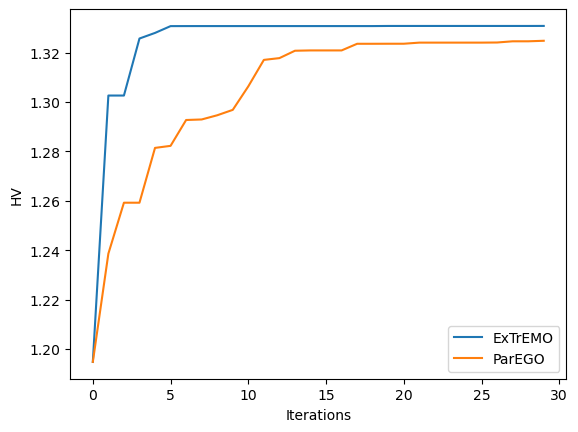

In [108]:
from Utils.cal_hv import cal_hv
import matplotlib.pyplot as plt

hv_ExTrEMO = cal_hv(yT_ExTrEMO, test_problem.norm_for_hv)
hv_ParEGO = cal_hv(yT_ParEGO, test_problem.norm_for_hv)
plt.plot(hv_ExTrEMO,label = 'ExTrEMO')
plt.plot(hv_ParEGO,label = 'ParEGO')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('HV')
plt.show()

When the number of sources is large and the computational resources are incommensurate, one can activate the evolutionary selection module. We provide an optimization example with 5 high-correlation sources and 95 low-correlation sources. In each iteration, we select 5 sources by using the evolutionary source subset selection module.

In [109]:
xT_ExTrEMO_ES,yT_ExTrEMO_ES,Recorded_Sel_Sources = ExTrEMO(test_problem, 
            dataS[0][10:15]+dataS[0][410:495], 
            dataS[1][10:15]+dataS[1][410:495], 
            dataS[0][0], 
            dataS[1][0], 
            max_iters = 30, 
            likelihood = 'gaussian', 
            kernel = 'RBF',
            opt_train='l-bfgs',
            opt_acqf='ga',
            subset_sel = 'es_select',
            q_sub = 5,
            )

[[31.37478683 36.41452864  0.        ]]
[[6.09386002 4.25162163 0.01159476]]
[[ 9.24375104 10.13781863 14.95958549]]
[[8.50882118 3.69167836 0.        ]]
[[4.3277049  0.52016288 0.3251497 ]]
[[1.85873811 6.27413039 2.35537789]]
[[0.05912082 3.52203963 7.09104171]]
[[ 0.41352741  3.115083   35.39731583]]
[[0.41605212 5.15467369 5.77901384]]
[[5.91365043e-16 1.19388220e-15 2.17583800e+01]]
[[5.48834452 4.75290464 1.37330129]]
[[1.75079039 0.0849241  8.24072538]]
[[ 0.78514159 29.43895387  8.91351432]]
[[1.51997127 1.16809633 3.85549485]]
[[ 0.50704286  1.14636406 12.1670968 ]]
[[ 0.23147285  5.34875547 35.16413769]]
[[1.08992484e-15 7.43704610e-16 2.15487761e+01]]
[[ 6.92891938 16.14854421  0.        ]]
[[19.14845311  0.68408767 18.75454753]]
[[1.24419519 0.2915775  1.05813468]]
[[0.31741777 0.02961581 9.56199121]]
[[0.01021689 0.11676686 6.52881456]]
[[ 2.90141256 15.8929459   0.        ]]
[[ 1.11205603  0.22626455 56.04864703]]
[[9.57475562 0.         0.9725348 ]]
[[0.42401073 1.145124

We can check the sources selected in each iteration. It could be observed that, with the iteration, more and more high-correlation sources are selected.

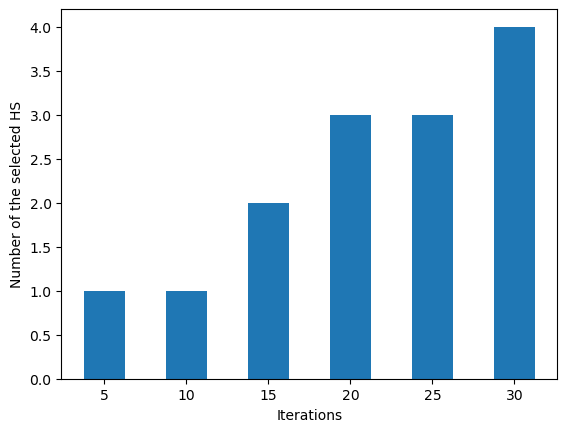

In [110]:
import numpy as np

sel_hs = np.sum(np.array(Recorded_Sel_Sources)<5,axis=1)
plt.bar([5,10,15,20,25,30],[sel_hs[4],sel_hs[9],sel_hs[14],sel_hs[19],sel_hs[24],sel_hs[29]], width = 2.5)
plt.xlabel('Iterations')
plt.ylabel('Number of the selected HS')
plt.show()

With the help of evolutionary source subset selection, ExTrEMO can also provide better results than ParEGO

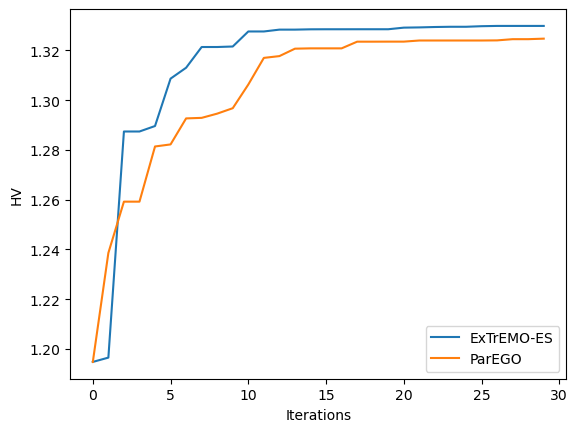

In [111]:
from Utils.cal_hv import cal_hv
import matplotlib.pyplot as plt

hv_ExTrEMO = cal_hv(yT_ExTrEMO_ES, test_problem.norm_for_hv)
hv_ParEGO = cal_hv(yT_ParEGO, test_problem.norm_for_hv)
plt.plot(hv_ExTrEMO,label = 'ExTrEMO-ES')
plt.plot(hv_ParEGO,label = 'ParEGO')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('HV')
plt.show()

The parameters of ExTrEMO are explained as follows:

    data_xS: The decision vectors saved in the source datasets;

    data_yS: The objective function values saved in the source datasets;

    data_xT: The decision vectors saved in the initilized dataset. If it is set to "None", the initilized dataset will be generated randomly; 

    data_yT: The objective function values saved in the initilized dataset. If it is set to "None", the initilized dataset will be generated randomly;  

    init_sample_size: The size of the initilized dataset. Default value is 20;

    max_iters: The maximul iterations of the optimization. Default value is 30;

    likelihood: The prior distribution of the Gaussian process. Default value is 'gaussian', which means a Gaussian prior. It can also be set to 'gaussian_with_gamma_prior', which is the default setting of BoTorch;

    kernel: The used kernel function. Default value is 'RBF', which means a RBF kernel. It can be also set to 'ARDMatern52', 'ARDMatern52_with_gamma_prior', 'ARDRBF', 'ARDRBF_with_gamma_prior', and 'Matern52'. Note that, 'ARDMatern52_with_gamma_prior' is the default setting of BoTorch;

    transfer: The used transfer kernel. Default value is 'transfer_kernel'. When it is set to 'transfer_kernel', the built transfer GP is the same with our original paper. The implementation about the transfer kernel can be found in "TransferKernel.py". It can also be set to 'multitask_kernel'. At this time, it is essentially a multitask GP;

    opt_train: The optimization method used to train the hyperparameters of the surrogate. Defult value is 'l-bfgs'. It can also be set to 'Adam', which means that the hyperparameters are trained by using Adam;

    opt_acqf: The optimization method used to optimize the acquisition function. Defult value is 'ga', which means that a genetic algorithm is used. It can also be set to 'l-bfgs';
    
    subset_sel: This parameter decides how to select the source datasets. Defult value is 'None', which means that all of the source datasets are used to build a factorized transfer GP. It can be set to 'es_select', which means evolutionary source subset selections are used. It can also be set to 'random', which means that a subset of source datasets is selected randomly.

    q_sub: When the evolutionary source subset selection is used, 'q_sub' sources will be selected in each iteration. Defult value of 'q_sub' is 5.